# Example 1: Query a table with SQL and magic commands

In [ ]:
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project group9finalproject
SELECT * FROM `group9finalproject.Uber_group9.cluster_analysis` #this table name was set based on the table you chose to query

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,trip_id,distance,duration,pay_base,pay_tolls,pay_congestion,pay_airport,pay_tips,shared_request_flag,shared_match_flag,...,weather_sunrise,sunrise_time,weather_temp,weather_precipitation,weather_wind,centroid_id,start_zone,start_borough,end_zone,end_borough
0,d708c4e4-8d76-40a4-b98f-f316a17be709,1.77,667,17.20,0.0,0.00,0.0,0.0,False,False,...,True,04:00,24.2,0.0,19.0,4,North Corona,Queens,Corona,Queens
1,60711d1d-b4bf-482f-976f-e0713ae8a49d,6.08,1334,40.85,0.0,2.75,0.0,0.0,False,False,...,True,05:00,23.9,0.0,7.6,5,Midtown Center,Manhattan,Morningside Heights,Manhattan
2,6cb7d8d6-1b7f-4b86-a2d3-8294e7c83bc4,6.14,1295,20.73,0.0,2.75,0.0,0.0,False,False,...,True,05:00,20.0,0.0,8.4,5,Astoria,Queens,Stuy Town/Peter Cooper Village,Manhattan
3,7b1598a8-bd82-4b4a-9e46-cefbce5cee07,4.59,782,16.50,0.0,0.00,0.0,0.0,False,False,...,True,05:00,4.8,0.0,25.0,4,Bay Ridge,Brooklyn,Red Hook,Brooklyn
4,63109d74-e420-4437-a4e1-04cc1b619144,6.90,1466,32.19,0.0,0.00,0.0,0.0,False,False,...,True,04:00,26.4,0.0,8.4,4,Crown Heights North,Brooklyn,Woodhaven,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853773,df8fb285-305e-4c38-a36a-ec8a369f2242,2.16,522,12.15,0.0,0.00,0.0,3.0,False,False,...,True,04:00,22.8,0.0,13.0,3,Long Island City/Hunters Point,Queens,Old Astoria,Queens
14853774,c6f87e57-f6c9-47d6-b0f1-4da593d56dc4,1.55,563,10.89,0.0,0.00,0.0,0.0,False,False,...,False,04:00,15.0,0.0,9.3,3,Long Island City/Hunters Point,Queens,Sunnyside,Queens
14853775,09721d5f-68ea-4152-85da-f96f944a89c7,2.41,681,26.80,0.0,2.75,0.0,0.0,False,False,...,True,05:00,8.5,0.0,8.4,5,Long Island City/Hunters Point,Queens,Midtown Center,Manhattan
14853776,8b786049-ee28-4472-833f-2054e004bd4a,3.13,892,18.57,0.0,0.00,0.0,0.0,False,False,...,False,05:00,17.2,0.0,6.3,3,Long Island City/Hunters Point,Queens,Times Sq/Theatre District,Manhattan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=results,
    x='distance',
    y='duration',
    size='driver_earnings',
    hue='driver_earnings',
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)

plt.colorbar(scatter.collections[-1], label='Driver Earnings')  # 颜色栏映射
plt.title('Trip Distance vs Duration (with Earnings)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.show()

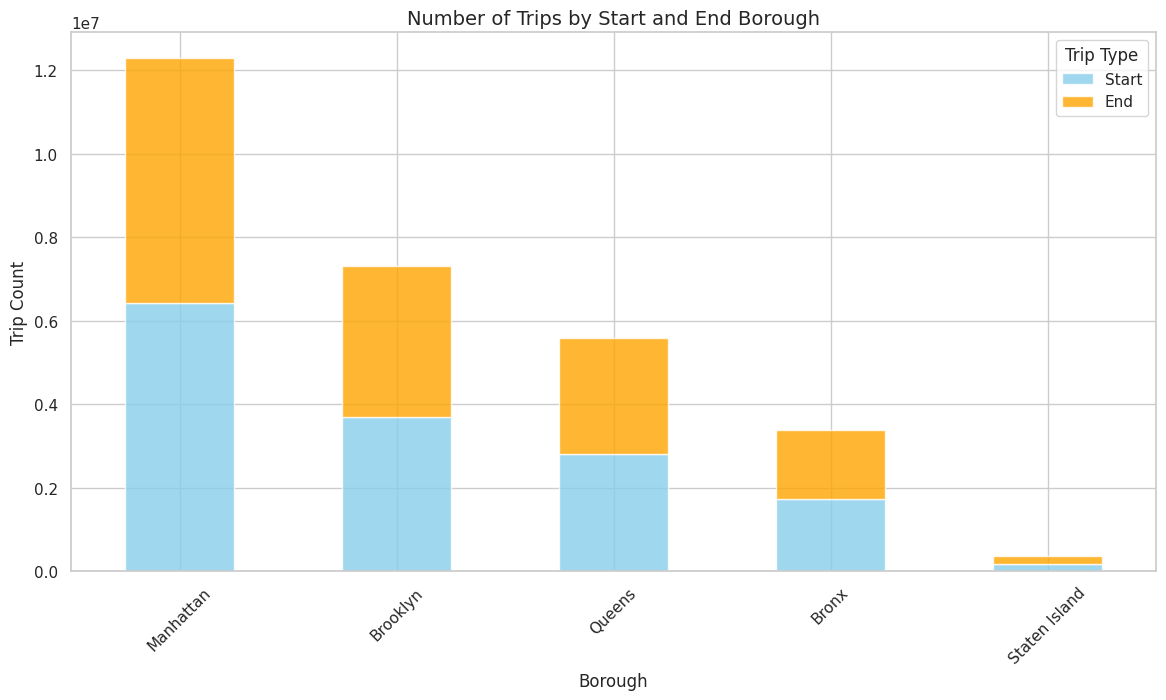

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

start_counts = results['start_borough'].value_counts()
end_counts = results['end_borough'].value_counts()

location_counts = pd.DataFrame({'Start': start_counts, 'End': end_counts}).fillna(0)

location_counts.plot(kind='bar', figsize=(14, 7), stacked=True, color=['skyblue', 'orange'], alpha=0.8)
plt.title('Number of Trips by Start and End Borough', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)
plt.legend(title='Trip Type')
plt.xticks(rotation=45)
plt.show()